# Image clusstering 


### K mean clusting 

> K - need to mention (How many cluters)

### Heirchachichal Approach of clutering 

> Number of clusters are decided based on similarity. 



### 1. Loading a libraries 



In [15]:
import os
import numpy as np
import cv2

import csv
from sklearn.cluster import KMeans
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.utils import img_to_array  # Updated import
from keras.models import Model

In [9]:
# Path to your image dataset (200 folders)
image_folder_path = r"D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\CUB_200_2011\imagesrs"

# Parameters
IMG_SIZE = (224, 224)  # Image size for the CNN
N_CLUSTERS = 3 # Number of clusters

# Load pre-trained VGG16 model and remove the top layers
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)


In [10]:
# Path to your image dataset (200 folders)
image_folder_path = r"D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\small_cub_dataset"

In [11]:
# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, IMG_SIZE)  # Resize image
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)  # Preprocess for VGG16
    return image

In [ ]:
# Extract features from images
image_paths = []
features = []

for class_folder in os.listdir(image_folder_path):
    class_folder_path = os.path.join(image_folder_path, class_folder)
    
    # Ensure it's a directory
    if os.path.isdir(class_folder_path):
        for image_name in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_name)
            image_paths.append(image_path)  # Save the image path
            
            # Load and preprocess image
            image = load_and_preprocess_image(image_path)
            
            # Extract features
            feature = model.predict(image)
            features.append(feature.flatten())  # Flatten the feature array

In [ ]:
# Convert features to numpy array
features = np.array(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
clusters = kmeans.fit_predict(features)

# # Save/print clustering results
# for i, image_path in enumerate(image_paths):
#     print(f"Image: {image_path} -> Cluster: {clusters[i]}")



# # Save clustering results to CSV
# csv_file = "Small_cub_clustering_results.csv"
# with open(csv_file, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(["Image Path", "Cluster"])  # Write header
#     for i, image_path in enumerate(image_paths):
#         writer.writerow([image_path, clusters[i]])  # Write image path and corresponding cluster
#         print(f"Image: {image_path} -> Cluster: {clusters[i]}")


# print(f"Clustering results saved to {csv_file}")



# Save clustering results to CSV
csv_file = "Small_cub_clustering_results.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image Path", "Cluster"])  # Write header

    for class_folder in os.listdir(image_folder_path):
        class_folder_path = os.path.join(image_folder_path, class_folder)

        # Ensure it's a directory
        if os.path.isdir(class_folder_path):
            image_paths = []
            features = []  # Initialize as a list
            
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                image_paths.append(image_path)  # Save the image path

                # Load and preprocess image
                image = load_and_preprocess_image(image_path)

                # Extract features
                feature = model.predict(image)
                features.append(feature.flatten())  # Flatten the feature array

            # Convert features to numpy array after processing all images in the folder
            features = np.array(features)

            # Apply K-Means clustering
            if len(features) > 0:
                kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
                clusters = kmeans.fit_predict(features)

            # Write clustering results for the current folder to CSV
            for i, image_path in enumerate(image_paths):
                writer.writerow([image_path, clusters[i]])  # Write image path and corresponding cluster
                print(f"Image: {image_path} -> Cluster: {clusters[i]}")

            # Write a blank row to separate folders
            writer.writerow([])

print(f"Clustering results saved to {csv_file}")






In [20]:
# Path to your image dataset (200 folders)
image_folder_path = r"D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\CUB_200_2011\images"

# Parameters
IMG_SIZE = (224, 224)  # Image size for the CNN
N_CLUSTERS = 2 # Number of clusters

# Load pre-trained VGG16 model and remove the top layers
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)


In [21]:
# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, IMG_SIZE)  # Resize image
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)  # Preprocess for VGG16
    return image

In [ ]:

# Save clustering results to CSV
csv_file = "complete_cub_2_clustering_results.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image Path", "Cluster"])  # Write header

    for class_folder in os.listdir(image_folder_path):
        class_folder_path = os.path.join(image_folder_path, class_folder)

        # Ensure it's a directory
        if os.path.isdir(class_folder_path):
            image_paths = []
            features = []  # Initialize as a list
            
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                image_paths.append(image_path)  # Save the image path

                # Load and preprocess image
                image = load_and_preprocess_image(image_path)

                # Extract features
                feature = model.predict(image)
                features.append(feature.flatten())  # Flatten the feature array

            # Convert features to numpy array after processing all images in the folder
            features = np.array(features)

            # Apply K-Means clustering
            if len(features) > 0:
                kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
                clusters = kmeans.fit_predict(features)

            # Write clustering results for the current folder to CSV
            for i, image_path in enumerate(image_paths):
                writer.writerow([image_path, clusters[i]])  # Write image path and corresponding cluster
                print(f"Image: {image_path} -> Cluster: {clusters[i]}")

            # Write a blank row to separate folders
            writer.writerow([])

print(f"Clustering results saved to {csv_file}")


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('complete_cub_2_clustering_results.csv')

# Remove any leading or trailing whitespace characters in the column names
df.columns = df.columns.str.strip()

# Strip any leading or trailing whitespace in all string columns
df['Image Path'] = df['Image Path'].str.strip()

# Extract class from the image path
df['Class'] = df['Image Path'].apply(lambda x: x.split('\\')[-2])

# Group by Class and Cluster and count the occurrences
grouped = df.groupby(['Class', 'Cluster']).size().unstack(fill_value=0)

# Add a new column to determine the predominant cluster
grouped['finalCluster'] = (grouped[0] < grouped[1]).astype(int)

# Print the results
print(grouped)

# Save the results to a new CSV file
output_path = 'Assign_cluster_cub_2.csv'  # Specify your output file path here
grouped.to_csv(output_path)


In [21]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Assign_cluster_cub_2.csv', delimiter=',')  # Using tab as delimiter

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Check the column names
print(df.columns)

Index(['Class', '0', '1', 'finalCluster'], dtype='object')


In [ ]:
print(df.head())


In [ ]:
# Filter the classes based on the predominant cluster
cluster_0_classes = df[df['finalCluster'] == 0]['Class'].tolist()
cluster_1_classes = df[df['finalCluster'] == 1]['Class'].tolist()

# Print the lists
print("Classes in Cluster 0:", cluster_0_classes)
print("Classes in Cluster 1:", cluster_1_classes)

# Working on Reduced cub dataset based on k-Mean clustering #

In [27]:
# Path to your image dataset (200 folders)
image_folder_path = r"D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering"

# Parameters
IMG_SIZE = (224, 224)  # Image size for the CNN
N_CLUSTERS = 2 # Number of clusters

# Load pre-trained VGG16 model and remove the top layers
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)


In [28]:
# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, IMG_SIZE)  # Resize image
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)  # Preprocess for VGG16
    return image

In [29]:

# Save clustering results to CSV
csv_file = "reduced_cub_2_clustering_results.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Image Path", "Cluster"])  # Write header

    for class_folder in os.listdir(image_folder_path):
        class_folder_path = os.path.join(image_folder_path, class_folder)

        # Ensure it's a directory
        if os.path.isdir(class_folder_path):
            image_paths = []
            features = []  # Initialize as a list
            
            for image_name in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_name)
                image_paths.append(image_path)  # Save the image path

                # Load and preprocess image
                image = load_and_preprocess_image(image_path)

                # Extract features
                feature = model.predict(image)
                features.append(feature.flatten())  # Flatten the feature array

            # Convert features to numpy array after processing all images in the folder
            features = np.array(features)

            # Apply K-Means clustering
            if len(features) > 0:
                kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
                clusters = kmeans.fit_predict(features)

            # Write clustering results for the current folder to CSV
            for i, image_path in enumerate(image_paths):
                writer.writerow([image_path, clusters[i]])  # Write image path and corresponding cluster
                print(f"Image: {image_path} -> Cluster: {clusters[i]}")

            # Write a blank row to separate folders
            writer.writerow([])

print(f"Clustering results saved to {csv_file}")


1/1 [==============================] - 0s 207ms/step


c:\Users\91932\miniconda3\envs\shafin\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91932\miniconda3\envs\shafin\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\001.Black_footed_Albatross\Black_Footed_Albatross_0001_796111.jpg -> Cluster: 0
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\001.Black_footed_Albatross\Black_Footed_Albatross_0002_55.jpg -> Cluster: 1
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\001.Black_footed_Albatross\Black_Footed_Albatross_0003_796136.jpg -> Cluster: 0
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\001.Black_footed_Albatross\Black_Footed_Albatross_0005_796090.jpg -> Cluster: 0
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\001.Black_footed_Albatross\Black_Footed_Albatross_0006_796065.jpg -> Cluster: 0
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\001.Black_footed_Albat

c:\Users\91932\miniconda3\envs\shafin\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91932\miniconda3\envs\shafin\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\004.Groove_billed_Ani\Groove_Billed_Ani_0002_1670.jpg -> Cluster: 0
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\004.Groove_billed_Ani\Groove_Billed_Ani_0004_1528.jpg -> Cluster: 1
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\004.Groove_billed_Ani\Groove_Billed_Ani_0005_1750.jpg -> Cluster: 0
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\004.Groove_billed_Ani\Groove_Billed_Ani_0006_1763.jpg -> Cluster: 1
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\004.Groove_billed_Ani\Groove_Billed_Ani_0007_1615.jpg -> Cluster: 1
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\004.Groove_billed_Ani\Groove_Billed_Ani_0009_1522.jpg -> Cluster: 1
Image: D:\

c:\Users\91932\miniconda3\envs\shafin\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91932\miniconda3\envs\shafin\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\005.Crested_Auklet\Crested_Auklet_0001_794941.jpg -> Cluster: 1
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\005.Crested_Auklet\Crested_Auklet_0003_794962.jpg -> Cluster: 1
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\005.Crested_Auklet\Crested_Auklet_0005_794922.jpg -> Cluster: 1
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\005.Crested_Auklet\Crested_Auklet_0006_1813.jpg -> Cluster: 1
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\005.Crested_Auklet\Crested_Auklet_0010_794907.jpg -> Cluster: 1
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\005.Crested_Auklet\Crested_Auklet_0011_794927.jpg -> Cluster: 1
Image: D:\ZSL\Dataset\CUB_dataset_12

c:\Users\91932\miniconda3\envs\shafin\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\91932\miniconda3\envs\shafin\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\006.Least_Auklet\Least_Auklet_0004_795112.jpg -> Cluster: 1
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\006.Least_Auklet\Least_Auklet_0005_795119.jpg -> Cluster: 1
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\006.Least_Auklet\Least_Auklet_0007_795123.jpg -> Cluster: 1
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\006.Least_Auklet\Least_Auklet_0008_795071.jpg -> Cluster: 0
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\006.Least_Auklet\Least_Auklet_0010_795092.jpg -> Cluster: 0
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\reduced_cub_dataset_k_mean_clustering\006.Least_Auklet\Least_Auklet_0011_795109.jpg -> Cluster: 0
Image: D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)

KeyboardInterrupt: 

In [19]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('reduced_cub_2_clustering_results.csv')

# Remove any leading or trailing whitespace characters in the column names
df.columns = df.columns.str.strip()

# Strip any leading or trailing whitespace in all string columns
df['Image Path'] = df['Image Path'].str.strip()

# Extract class from the image path
df['Class'] = df['Image Path'].apply(lambda x: x.split('\\')[-2])

# Group by Class and Cluster and count the occurrences
grouped = df.groupby(['Class', 'Cluster']).size().unstack(fill_value=0)

# Add a new column to determine the predominant cluster
grouped['finalCluster'] = (grouped[0] < grouped[1]).astype(int)

# Print the results
print(grouped)

# Save the results to a new CSV file
output_path = 'reduced_Assign_cluster_cub_2.csv'  # Specify your output file path here
grouped.to_csv(output_path)


Cluster                      0   1  finalCluster
Class                                           
001.Black_footed_Albatross  42  18             0
004.Groove_billed_Ani       32  28             0
005.Crested_Auklet           7  37             1
006.Least_Auklet            17  24             1
009.Brewer_Blackbird        43  17             0
...                         ..  ..           ...
188.Pileated_Woodpecker     42  18             0
189.Red_bellied_Woodpecker  36  24             0
193.Bewick_Wren             36  24             0
195.Carolina_Wren           34  26             0
200.Common_Yellowthroat     40  20             0

[120 rows x 3 columns]


In [20]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('reduced_Assign_cluster_cub_2.csv', delimiter=',')  # Using tab as delimiter

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Check the column names
print(df.columns)

Index(['Class', '0', '1', 'finalCluster'], dtype='object')


In [23]:
# Filter the classes based on the predominant cluster
cluster_0_classes = df[df['finalCluster'] == 0]['Class'].tolist()
cluster_1_classes = df[df['finalCluster'] == 1]['Class'].tolist()

# Count the total number of unique classes in each cluster
num_cluster_0_classes = len(cluster_0_classes)
num_cluster_1_classes = len(cluster_1_classes)

# Print the number of elements in each cluster 
print("Number of Classes in Cluster 0:", num_cluster_0_classes)
print("Number of Classes in Cluster 1:", num_cluster_1_classes)

# Print the lists
print("Classes in Cluster 0:", cluster_0_classes)
print("Classes in Cluster 1:", cluster_1_classes)

Number of Classes in Cluster 0: 56
Number of Classes in Cluster 1: 64
Classes in Cluster 0: ['001.Black_footed_Albatross', '004.Groove_billed_Ani', '009.Brewer_Blackbird', '013.Bobolink', '014.Indigo_Bunting', '015.Lazuli_Bunting', '018.Spotted_Catbird', '020.Yellow_breasted_Chat', '021.Eastern_Towhee', '022.Chuck_will_Widow', '026.Bronzed_Cowbird', '029.American_Crow', '030.Fish_Crow', '036.Northern_Flicker', '044.Frigatebird', '059.California_Gull', '060.Glaucous_winged_Gull', '061.Heermann_Gull', '062.Herring_Gull', '068.Ruby_throated_Hummingbird', '070.Green_Violetear', '076.Dark_eyed_Junco', '077.Tropical_Kingbird', '085.Horned_Lark', '086.Pacific_Loon', '087.Mallard', '088.Western_Meadowlark', '092.Nighthawk', '096.Hooded_Oriole', '103.Sayornis', '106.Horned_Puffin', '107.Common_Raven', '111.Loggerhead_Shrike', '113.Baird_Sparrow', '114.Black_throated_Sparrow', '117.Clay_colored_Sparrow', '120.Fox_Sparrow', '121.Grasshopper_Sparrow', '123.Henslow_Sparrow', '125.Lincoln_Sparrow', 

## Hiercahchical Clusering 

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
def extract_features(image_paths):
    model = VGG16(weights='imagenet', include_top=False, pooling='avg')
    features = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        feature = model.predict(img_array).flatten()
        features.append(feature)
    return np.array(features)

def load_images_from_folders(root_folder):
    image_paths = []
    class_names = []
    for class_name in os.listdir(root_folder):
        class_folder = os.path.join(root_folder, class_name)
        if os.path.isdir(class_folder):
            for img_file in os.listdir(class_folder):
                if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_paths.append(os.path.join(class_folder, img_file))
                    class_names.append(class_name)
    return image_paths, class_names


def add_cluster_to_paths(image_paths, clusters):
    clustered_paths = []
    for img_path, cluster_id in zip(image_paths, clusters):
        folder_name = os.path.basename(os.path.dirname(img_path))
        clustered_paths.append([f"{folder_name}/{os.path.basename(img_path)}", cluster_id])
    return clustered_paths

In [10]:
# Set your dataset path
dataset_path = r'D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\small_cub_dataset'

# Load image paths and class names
image_paths, class_names = load_images_from_folders(dataset_path)

# Extract features
features = extract_features(image_paths)

1/1 [==============================] - 0s 147ms/step


In [11]:
# Normalize and reduce dimensions
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA(n_components=100)  # Adjust number of components as needed
features_pca = pca.fit_transform(features_scaled)

# Compute distance matrix and perform hierarchical clustering
# distance_matrix = pairwise_distances(features_pca)
distance_matrix = pairwise_distances(features_pca, metric='cosine')
Z = linkage(distance_matrix, method='ward')

C:\Users\91932\AppData\Local\Temp\ipykernel_20460\739286894.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')


In [12]:
import pandas as pd

# Form more clusters (e.g., 10 instead of 2)
clusters = fcluster(Z, t=2, criterion='maxclust')

df = pd.DataFrame({
    'Image Path': image_paths,
    'Class Name': class_names,
    'Cluster': clusters
})

# Save the updated DataFrame with more clusters
df.to_csv('Trail_cluster_2.csv', index=False)

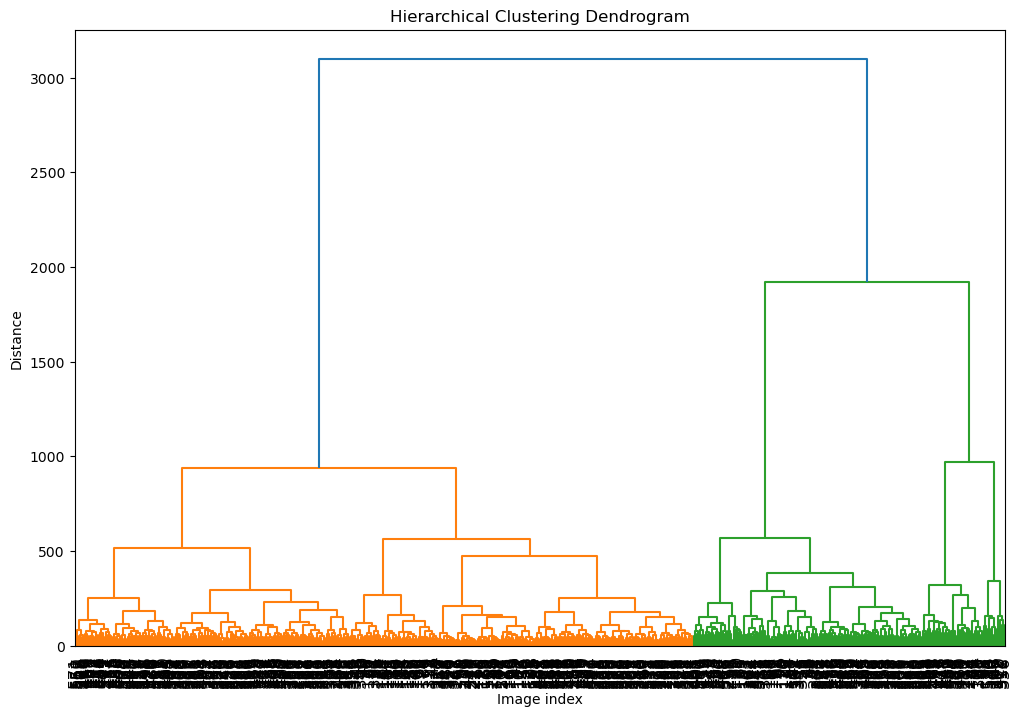

In [66]:

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Image index')
plt.ylabel('Distance')
plt.show()


In [36]:
# Form flat clusters
max_d = 50  # Adjust based on your needs
clusters = fcluster(Z, max_d, criterion='distance')

# Map clusters to image paths
cluster_dict = defaultdict(list)
for img_path, cluster_id in zip(image_paths, clusters):
    cluster_dict[cluster_id].append(img_path)


In [ ]:
# Print clusters
for cluster_id, img_paths in cluster_dict.items():
    print(f"Cluster {cluster_id}:")
    for path in img_paths:
        print(f"  {path}")

In [59]:
# Form exactly 2 clusters
clusters = fcluster(Z, t=2, criterion='maxclust')

In [60]:
# Add cluster numbers to image paths
clustered_image_paths = add_cluster_to_paths(image_paths, clusters)

# Convert list to DataFrame
df = pd.DataFrame(clustered_image_paths, columns=['Image Path', 'Cluster'])

# Save DataFrame to CSV
output_csv_path = 'Complete_cub_hirchachichal.csv'
df.to_csv(output_csv_path, index=False)

# Print the results
for path in clustered_image_paths:
    print(path)

['001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.jpg', 2]
['001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', 1]
['001.Black_footed_Albatross/Black_Footed_Albatross_0003_796136.jpg', 2]
['001.Black_footed_Albatross/Black_Footed_Albatross_0005_796090.jpg', 1]
['001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg', 2]
['001.Black_footed_Albatross/Black_Footed_Albatross_0007_796138.jpg', 2]
['001.Black_footed_Albatross/Black_Footed_Albatross_0008_796083.jpg', 2]
['001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', 2]
['001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg', 2]
['001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', 2]
['001.Black_footed_Albatross/Black_Footed_Albatross_0016_796067.jpg', 2]
['001.Black_footed_Albatross/Black_Footed_Albatross_0017_796098.jpg', 2]
['001.Black_footed_Albatross/Black_Footed_Albatross_0019_796104.jpg', 2]
['001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059

In [61]:
import pandas as pd

# Load your CSV file
df = pd.read_csv('Complete_cub_hirchachichal.csv')

# Extract class name from the image path (assuming this part is done)
df['Class'] = df['Image Path'].apply(lambda x: x.split('/')[0])  # Adjust based on your path structure

# Count the number of images in each cluster for each class
cluster_counts = df.groupby(['Class', 'Cluster']).size().unstack(fill_value=0)

# Determine the predominant cluster for each class
cluster_counts['Predominant Cluster'] = cluster_counts.apply(lambda row: 1 if row[1] > row[2] else 2, axis=1)

# Merge the predominant cluster back into the original DataFrame
df = df.merge(cluster_counts[['Predominant Cluster']], on='Class', how='left')

# Print the result
print(df.head())

# Save the updated DataFrame with the predominant cluster
output_csv_path = 'updated_Complete_cub_hirchachichal.csv'
df.to_csv(output_csv_path, index=False)

print(f"Updated data saved to {output_csv_path}")


                                          Image Path  Cluster  \
0  001.Black_footed_Albatross/Black_Footed_Albatr...        2   
1  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
2  001.Black_footed_Albatross/Black_Footed_Albatr...        2   
3  001.Black_footed_Albatross/Black_Footed_Albatr...        1   
4  001.Black_footed_Albatross/Black_Footed_Albatr...        2   

                        Class  Predominant Cluster  
0  001.Black_footed_Albatross                    2  
1  001.Black_footed_Albatross                    2  
2  001.Black_footed_Albatross                    2  
3  001.Black_footed_Albatross                    2  
4  001.Black_footed_Albatross                    2  
Updated data saved to updated_Complete_cub_hirchachichal.csv


In [52]:
def extract_class_name(image_path):
    try:
        # Split by directory separator and get the second-to-last part
        parts = image_path.replace('\\', '/').split('/')
        if len(parts) >= 2:
            return parts[-2]
        else:
            return None  # Or a placeholder like 'Unknown' if the path format is inconsistent
    except Exception as e:
        print(f"Error processing path {image_path}: {e}")
        return None  # Or a placeholder like 'Unknown'

# Apply the function to extract class names
df['Class'] = df['Image Path'].apply(extract_class_name)

# Print the DataFrame to verify
print(df.head())

                                          Image Path  Cluster  \
0  001.Black_footed_Albatross/Black_Footed_Albatr...        2   
1  001.Black_footed_Albatross/Black_Footed_Albatr...        2   
2  001.Black_footed_Albatross/Black_Footed_Albatr...        2   
3  001.Black_footed_Albatross/Black_Footed_Albatr...        2   
4  001.Black_footed_Albatross/Black_Footed_Albatr...        2   

                        Class  
0  001.Black_footed_Albatross  
1  001.Black_footed_Albatross  
2  001.Black_footed_Albatross  
3  001.Black_footed_Albatross  
4  001.Black_footed_Albatross  


In [54]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('clustered_image_paths.csv')

# Remove any leading or trailing whitespace characters in the column names
df.columns = df.columns.str.strip()

# Strip any leading or trailing whitespace in all string columns
df['Image Path'] = df['Image Path'].str.strip()

# Apply the function to extract class names
df['Class'] = df['Image Path'].apply(extract_class_name)

# Group by Class and Cluster and count the occurrences
grouped = df.groupby(['Image Path', 'Cluster']).size().unstack(fill_value=0)

# Add a new column to determine the predominant cluster
grouped['finalCluster'] = (grouped[1] < grouped[2]).astype(int)

# Print the results
print(grouped)

# Save the results to a new CSV file
output_path = 'Assign_cluster_cub_2_hierchichal.csv'  # Specify your output file path here
grouped.to_csv(output_path)


Cluster                                             1  2  finalCluster
Image Path                                                            
001.Black_footed_Albatross/Black_Footed_Albatro...  0  1             1
001.Black_footed_Albatross/Black_Footed_Albatro...  0  1             1
001.Black_footed_Albatross/Black_Footed_Albatro...  0  1             1
001.Black_footed_Albatross/Black_Footed_Albatro...  0  1             1
001.Black_footed_Albatross/Black_Footed_Albatro...  0  1             1
...                                                .. ..           ...
012.Yellow_headed_Blackbird/Yellow_Headed_Black...  0  1             1
012.Yellow_headed_Blackbird/Yellow_Headed_Black...  0  1             1
012.Yellow_headed_Blackbird/Yellow_Headed_Black...  0  1             1
012.Yellow_headed_Blackbird/Yellow_Headed_Black...  0  1             1
012.Yellow_headed_Blackbird/Yellow_Headed_Black...  0  1             1

[600 rows x 3 columns]


### 2. Training a FastText Model on a Custom Corpus

You can also train a FastText model on your custom corpus. Here is an example:

In [7]:

# #giving very less similarity 



# from gensim.models import FastText
# from gensim.utils import simple_preprocess

# # Example sentences
# # sentences = [
# #     "Cats and dogs are both popular household pets, yet cats are more independent and often prefer solitude. They share some hunting instincts with their larger feline cousins like lions and tigers.",
# #     "Dogs and cats are common pets, but dogs are known for their loyalty and tendency to form strong bonds with humans. Unlike solitary big cats, dogs are social animals that thrive in packs.",
# #     "Horses, like elephants, have been domesticated to assist humans in various tasks. However, horses are known for their speed and agility, whereas elephants are prized for their strength and intelligence.",
# #     "Lions and tigers are both apex predators, but lions are social animals living in prides. In contrast, tigers are solitary creatures, only coming together during mating or to raise cubs.",
# #     "Tigers share their powerful physique and hunting prowess with lions. Unlike the social lions, tigers are mostly solitary, showcasing a stark behavioral difference between the two big cats.",
# #     "Elephants, similar to horses, have been used by humans for labor due to their strength. Elephants, however, are highly intelligent with complex social structures, unlike the more individually task-oriented horses.",
# # ]
# sentences = ['Black_footed_Albatross', 'Laysan_Albatross', 'Sooty_Albatross', 'Groove_billed_Ani', 'Crested_Auklet', 'Least_Auklet', 'Parakeet_Auklet',
#               'Rhinoceros_Auklet', 'Brewer_Blackbird', 'Red_winged_Blackbird', 'Rusty_Blackbird', 'Yellow_headed_Blackbird', 'Bobolink', 
#               'Indigo_Bunting', 'Lazuli_Bunting', 'Painted_Bunting', 'Cardinal', 'Spotted_Catbird', 'Gray_Catbird', 'Yellow_breasted_Chat',
#                 'Eastern_Towhee', 'Chuck_will_Widow', 'Brandt_Cormorant', 'Red_faced_Cormorant', 'Pelagic_Cormorant', 'Bronzed_Cowbird', 'Shiny_Cowbird', 
#                 'Brown_Creeper', 'American_Crow', 'Fish_Crow', 'Black_billed_Cuckoo', 'Mangrove_Cuckoo', 'Yellow_billed_Cuckoo', 'Gray_crowned_Rosy_Finch', 
#                 'Purple_Finch', 'Northern_Flicker', 'Acadian_Flycatcher', 'Great_Crested_Flycatcher', 'Least_Flycatcher', 'Olive_sided_Flycatcher',
#                   'Scissor_tailed_Flycatcher', 'Vermilion_Flycatcher', 'Yellow_bellied_Flycatcher', 'Frigatebird', 'Northern_Fulmar', 'Gadwall',
#                     'American_Goldfinch', 'European_Goldfinch', 'Boat_tailed_Grackle', 'Eared_Grebe', 'Horned_Grebe', 'Pied_billed_Grebe', 'Western_Grebe', 
#                     'Blue_Grosbeak', 'Evening_Grosbeak', 'Pine_Grosbeak', 'Rose_breasted_Grosbeak', 'Pigeon_Guillemot', 'California_Gull', 'Glaucous_winged_Gull', 
#                     'Heermann_Gull', 'Herring_Gull', 'Ivory_Gull', 'Ring_billed_Gull', 'Slaty_backed_Gull', 'Western_Gull', 'Anna_Hummingbird', 'Ruby_throated_Hummingbird', 
#                     'Rufous_Hummingbird', 'Green_Violetear', 'Long_tailed_Jaeger', 'Pomarine_Jaeger', 'Blue_Jay', 'Florida_Jay', 'reen_Jay', 'Dark_eyed_Junco', 
#                     'Tropical_Kingbird', 'Gray_Kingbird', 'Belted_Kingfisher', 'Green_Kingfisher', 'Pied_Kingfisher', 'Ringed_Kingfisher', 'White_breasted_Kingfisher',
#                     'Red_legged_Kittiwake', 'Horned_Lark', 'Pacific_Loon', 'Mallard', 'Western_Meadowlark', 'Hooded_Merganser', 'Red_breasted_Merganser', 'Mockingbird', 
#                     'Nighthawk', 'Clark_Nutcracker', 'White_breasted_Nuthatch', 'Baltimore_Oriole', 'Hooded_Oriole', 'Orchard_Oriole', 'Scott_Oriole', 'Ovenbird', 
#                     'Brown_Pelican', 'White_Pelican', 'Western_Wood_Pewee', 'Sayornis', 'American_Pipit', 'Whip_poor_Will', 'Horned_Puffin', 'Common_Raven', 
#                     'White_necked_Raven', 'American_Redstart', 'Geococcyx', 'Loggerhead_Shrike', 'Great_Grey_Shrike', 'Baird_Sparrow', 'Black_throated_Sparrow', 
#                     'Brewer_Sparrow', 'Chipping_Sparrow', 'Clay_colored_Sparrow', 'House_Sparrow', 'Field_Sparrow', 'Fox_Sparrow', 'Grasshopper_Sparrow', 
#                     'Harris_Sparrow', 'Henslow_Sparrow', 'Le_Conte_Sparrow', 'Lincoln_Sparrow', 'Nelson_Sharp_tailed_Sparrow', 'Savannah_Sparrow', 
#                     'Seaside_Sparrow', 'Song_Sparrow', 'Tree_Sparrow', 'Vesper_Sparrow', 'White_crowned_Sparrow', 'White_throated_Sparrow', 
#                     'Cape_Glossy_Starling', 'Bank_Swallow', 'Barn_Swallow', 'Cliff_Swallow', 'Tree_Swallow', 'Scarlet_Tanager', 'Summer_Tanager', 
#                     'Artic_Tern', 'Black_Tern', 'Caspian_Tern', 'Common_Tern', 'Elegant_Tern', 'Forsters_Tern', 'Least_Tern', 'Green_tailed_Towhee', 
#                     'Brown_Thrasher', 'Sage_Thrasher', 'Black_capped_Vireo', 'Blue_headed_Vireo', 'Philadelphia_Vireo', 'Red_eyed_Vireo', 'Warbling_Vireo', 
#                     'White_eyed_Vireo', 'Yellow_throated_Vireo', 'Bay_breasted_Warbler', 'Black_and_white_Warbler', 'Black_throated_Blue_Warbler', 
#                     'Blue_winged_Warbler', 'Canada_Warbler', 'Cape_May_Warbler', 'Cerulean_Warbler', 'Chestnut_sided_Warbler', 'Golden_winged_Warbler', 
#                     'Hooded_Warbler', 'Kentucky_Warbler', 'Magnolia_Warbler', 'Mourning_Warbler', 'Myrtle_Warbler', 'Nashville_Warbler', 'Orange_crowned_Warbler', 
#                     'Palm_Warbler', 'Pine_Warbler', 'Prairie_Warbler', 'Prothonotary_Warbler', 'Swainson_Warbler', 'Tennessee_Warbler', 'Wilson_Warbler', 
#                     'Worm_eating_Warbler', 'Yellow_Warbler', 'Northern_Waterthrush', 'Louisiana_Waterthrush', 'Bohemian_Waxwing', 'Cedar_Waxwing', 
#                     'American_Three_toed_Woodpecker', 'Pileated_Woodpecker', 'Red_bellied_Woodpecker', 'Red_cockaded_Woodpecker', 'Red_headed_Woodpecker', 'Downy_Woodpecker', 
#              'Bewick_Wren', 'Cactus_Wren', 'Carolina_Wren', 'House_Wren', 'Marsh_Wren', 'Rock_Wren', 'Winter_Wren', 'Common_Yellowthroat']

# # Preprocess sentences
# sentences = [simple_preprocess(sentence) for sentence in sentences]

# print(f"sentences : {sentences} \n")

# # Train FastText model
# model = FastText(sentences, vector_size=300, window=5, min_count=1, epochs=10000)

# print(f"model : {model} \n")

sentences : [[], [], ['sooty_albatross'], [], ['crested_auklet'], ['least_auklet'], ['parakeet_auklet'], [], [], [], ['rusty_blackbird'], [], ['bobolink'], ['indigo_bunting'], ['lazuli_bunting'], ['painted_bunting'], ['cardinal'], ['spotted_catbird'], ['gray_catbird'], [], ['eastern_towhee'], [], [], [], [], ['bronzed_cowbird'], ['shiny_cowbird'], ['brown_creeper'], ['american_crow'], ['fish_crow'], [], ['mangrove_cuckoo'], [], [], ['purple_finch'], [], [], [], [], [], [], [], [], ['frigatebird'], ['northern_fulmar'], ['gadwall'], [], [], [], ['eared_grebe'], ['horned_grebe'], [], ['western_grebe'], ['blue_grosbeak'], [], ['pine_grosbeak'], [], [], ['california_gull'], [], ['heermann_gull'], ['herring_gull'], ['ivory_gull'], [], [], ['western_gull'], [], [], [], ['green_violetear'], [], ['pomarine_jaeger'], ['blue_jay'], ['florida_jay'], ['reen_jay'], ['dark_eyed_junco'], [], ['gray_kingbird'], [], [], ['pied_kingfisher'], [], [], [], ['horned_lark'], ['pacific_loon'], ['mallard'], [],

In [9]:
# removed preprocessing of sentence and getting similairty of auklet with result in all auklet classes


from gensim.models import FastText
from gensim.utils import simple_preprocess

# Example sentences
# sentences = [
#     "Cats and dogs are both popular household pets, yet cats are more independent and often prefer solitude. They share some hunting instincts with their larger feline cousins like lions and tigers.",
#     "Dogs and cats are common pets, but dogs are known for their loyalty and tendency to form strong bonds with humans. Unlike solitary big cats, dogs are social animals that thrive in packs.",
#     "Horses, like elephants, have been domesticated to assist humans in various tasks. However, horses are known for their speed and agility, whereas elephants are prized for their strength and intelligence.",
#     "Lions and tigers are both apex predators, but lions are social animals living in prides. In contrast, tigers are solitary creatures, only coming together during mating or to raise cubs.",
#     "Tigers share their powerful physique and hunting prowess with lions. Unlike the social lions, tigers are mostly solitary, showcasing a stark behavioral difference between the two big cats.",
#     "Elephants, similar to horses, have been used by humans for labor due to their strength. Elephants, however, are highly intelligent with complex social structures, unlike the more individually task-oriented horses.",
# ]
sentences = ['Black_footed_Albatross', 'Laysan_Albatross', 'Sooty_Albatross', 'Groove_billed_Ani', 'Crested_Auklet', 'Least_Auklet', 'Parakeet_Auklet',
              'Rhinoceros_Auklet', 'Brewer_Blackbird', 'Red_winged_Blackbird', 'Rusty_Blackbird', 'Yellow_headed_Blackbird', 'Bobolink', 
              'Indigo_Bunting', 'Lazuli_Bunting', 'Painted_Bunting', 'Cardinal', 'Spotted_Catbird', 'Gray_Catbird', 'Yellow_breasted_Chat',
                'Eastern_Towhee', 'Chuck_will_Widow', 'Brandt_Cormorant', 'Red_faced_Cormorant', 'Pelagic_Cormorant', 'Bronzed_Cowbird', 'Shiny_Cowbird', 
                'Brown_Creeper', 'American_Crow', 'Fish_Crow', 'Black_billed_Cuckoo', 'Mangrove_Cuckoo', 'Yellow_billed_Cuckoo', 'Gray_crowned_Rosy_Finch', 
                'Purple_Finch', 'Northern_Flicker', 'Acadian_Flycatcher', 'Great_Crested_Flycatcher', 'Least_Flycatcher', 'Olive_sided_Flycatcher',
                  'Scissor_tailed_Flycatcher', 'Vermilion_Flycatcher', 'Yellow_bellied_Flycatcher', 'Frigatebird', 'Northern_Fulmar', 'Gadwall',
                    'American_Goldfinch', 'European_Goldfinch', 'Boat_tailed_Grackle', 'Eared_Grebe', 'Horned_Grebe', 'Pied_billed_Grebe', 'Western_Grebe', 
                    'Blue_Grosbeak', 'Evening_Grosbeak', 'Pine_Grosbeak', 'Rose_breasted_Grosbeak', 'Pigeon_Guillemot', 'California_Gull', 'Glaucous_winged_Gull', 
                    'Heermann_Gull', 'Herring_Gull', 'Ivory_Gull', 'Ring_billed_Gull', 'Slaty_backed_Gull', 'Western_Gull', 'Anna_Hummingbird', 'Ruby_throated_Hummingbird', 
                    'Rufous_Hummingbird', 'Green_Violetear', 'Long_tailed_Jaeger', 'Pomarine_Jaeger', 'Blue_Jay', 'Florida_Jay', 'reen_Jay', 'Dark_eyed_Junco', 
                    'Tropical_Kingbird', 'Gray_Kingbird', 'Belted_Kingfisher', 'Green_Kingfisher', 'Pied_Kingfisher', 'Ringed_Kingfisher', 'White_breasted_Kingfisher',
                    'Red_legged_Kittiwake', 'Horned_Lark', 'Pacific_Loon', 'Mallard', 'Western_Meadowlark', 'Hooded_Merganser', 'Red_breasted_Merganser', 'Mockingbird', 
                    'Nighthawk', 'Clark_Nutcracker', 'White_breasted_Nuthatch', 'Baltimore_Oriole', 'Hooded_Oriole', 'Orchard_Oriole', 'Scott_Oriole', 'Ovenbird', 
                    'Brown_Pelican', 'White_Pelican', 'Western_Wood_Pewee', 'Sayornis', 'American_Pipit', 'Whip_poor_Will', 'Horned_Puffin', 'Common_Raven', 
                    'White_necked_Raven', 'American_Redstart', 'Geococcyx', 'Loggerhead_Shrike', 'Great_Grey_Shrike', 'Baird_Sparrow', 'Black_throated_Sparrow', 
                    'Brewer_Sparrow', 'Chipping_Sparrow', 'Clay_colored_Sparrow', 'House_Sparrow', 'Field_Sparrow', 'Fox_Sparrow', 'Grasshopper_Sparrow', 
                    'Harris_Sparrow', 'Henslow_Sparrow', 'Le_Conte_Sparrow', 'Lincoln_Sparrow', 'Nelson_Sharp_tailed_Sparrow', 'Savannah_Sparrow', 
                    'Seaside_Sparrow', 'Song_Sparrow', 'Tree_Sparrow', 'Vesper_Sparrow', 'White_crowned_Sparrow', 'White_throated_Sparrow', 
                    'Cape_Glossy_Starling', 'Bank_Swallow', 'Barn_Swallow', 'Cliff_Swallow', 'Tree_Swallow', 'Scarlet_Tanager', 'Summer_Tanager', 
                    'Artic_Tern', 'Black_Tern', 'Caspian_Tern', 'Common_Tern', 'Elegant_Tern', 'Forsters_Tern', 'Least_Tern', 'Green_tailed_Towhee', 
                    'Brown_Thrasher', 'Sage_Thrasher', 'Black_capped_Vireo', 'Blue_headed_Vireo', 'Philadelphia_Vireo', 'Red_eyed_Vireo', 'Warbling_Vireo', 
                    'White_eyed_Vireo', 'Yellow_throated_Vireo', 'Bay_breasted_Warbler', 'Black_and_white_Warbler', 'Black_throated_Blue_Warbler', 
                    'Blue_winged_Warbler', 'Canada_Warbler', 'Cape_May_Warbler', 'Cerulean_Warbler', 'Chestnut_sided_Warbler', 'Golden_winged_Warbler', 
                    'Hooded_Warbler', 'Kentucky_Warbler', 'Magnolia_Warbler', 'Mourning_Warbler', 'Myrtle_Warbler', 'Nashville_Warbler', 'Orange_crowned_Warbler', 
                    'Palm_Warbler', 'Pine_Warbler', 'Prairie_Warbler', 'Prothonotary_Warbler', 'Swainson_Warbler', 'Tennessee_Warbler', 'Wilson_Warbler', 
                    'Worm_eating_Warbler', 'Yellow_Warbler', 'Northern_Waterthrush', 'Louisiana_Waterthrush', 'Bohemian_Waxwing', 'Cedar_Waxwing', 
                    'American_Three_toed_Woodpecker', 'Pileated_Woodpecker', 'Red_bellied_Woodpecker', 'Red_cockaded_Woodpecker', 'Red_headed_Woodpecker', 'Downy_Woodpecker', 
             'Bewick_Wren', 'Cactus_Wren', 'Carolina_Wren', 'House_Wren', 'Marsh_Wren', 'Rock_Wren', 'Winter_Wren', 'Common_Yellowthroat']

# Convert sentences into list of lists (each name as a single token)
sentences = [[sentence] for sentence in sentences]

# Train FastText model
model = FastText(sentences, vector_size=300, window=5, min_count=1, epochs=10000)

# Print model summary
print(f"Model Vocabulary: {model.wv.index_to_key}")

Model Vocabulary: ['Common_Yellowthroat', 'Ivory_Gull', 'Blue_Jay', 'Pomarine_Jaeger', 'Long_tailed_Jaeger', 'Green_Violetear', 'Rufous_Hummingbird', 'Ruby_throated_Hummingbird', 'Anna_Hummingbird', 'Western_Gull', 'Slaty_backed_Gull', 'Ring_billed_Gull', 'Herring_Gull', 'Winter_Wren', 'Heermann_Gull', 'Glaucous_winged_Gull', 'California_Gull', 'Pigeon_Guillemot', 'Rose_breasted_Grosbeak', 'Pine_Grosbeak', 'Evening_Grosbeak', 'Blue_Grosbeak', 'Western_Grebe', 'Pied_billed_Grebe', 'Florida_Jay', 'reen_Jay', 'Dark_eyed_Junco', 'Tropical_Kingbird', 'Scott_Oriole', 'Orchard_Oriole', 'Hooded_Oriole', 'Baltimore_Oriole', 'White_breasted_Nuthatch', 'Clark_Nutcracker', 'Nighthawk', 'Mockingbird', 'Red_breasted_Merganser', 'Hooded_Merganser', 'Western_Meadowlark', 'Mallard', 'Pacific_Loon', 'Horned_Lark', 'Red_legged_Kittiwake', 'White_breasted_Kingfisher', 'Ringed_Kingfisher', 'Pied_Kingfisher', 'Green_Kingfisher', 'Belted_Kingfisher', 'Gray_Kingbird', 'Horned_Grebe', 'Eared_Grebe', 'Boat_tail

In [7]:
# Find the size of the sentences list
sentence_list_size = len(sentences)

# Print the size
print(f"Size of the sentence list: {sentence_list_size}")

Size of the sentence list: 200


In [17]:


# # Path to the text file
# file_path = r'D:\ZSL\Dataset\CUB_dataset_12_june_2024\archive (1)\CUB_200_2011\Cub_only_classes.txt'  # Update with your file path


# # Initialize an empty list to store the class names
# bird_classes = []

# # Read the file and add each class name to the list
# with open(file_path, 'r') as file:
#     for line in file:
#         # Strip whitespace and newline characters from the line
#         class_name = line.strip()
#         if class_name:  # Ensure the line isn't empty
#             bird_classes.append(class_name)

# # Print the list of bird classes
# print(bird_classes)


In [10]:
model.wv, len(model.wv), len(model.wv[0]) # model.wv.key_to_index

(<gensim.models.fasttext.FastTextKeyedVectors at 0x2793dce76d0>, 200, 300)

### 3. Finding Similar Words

Once you have a trained or pre-trained model, you can find similar words using the `most_similar` method:

In [6]:
# Find similar words to 'machine'
similar_words = model.wv.most_similar('Laysan_Albatross', topn=10)

print(similar_words)

[('Sooty_Albatross', 0.5256485939025879), ('Black_footed_Albatross', 0.3193644881248474), ('Grasshopper_Sparrow', 0.15157702565193176), ('Scarlet_Tanager', 0.13484880328178406), ('Common_Yellowthroat', 0.09486901760101318), ('Green_Kingfisher', 0.09464921057224274), ('Nighthawk', 0.09312396496534348), ('Pileated_Woodpecker', 0.0899885892868042), ('Pine_Grosbeak', 0.08782493323087692), ('Sayornis', 0.08640264719724655)]


In [20]:
import csv

# Define the output CSV file path
csv_file = "word_similarities_cub_dataset.csv"

# Open the CSV file to write the similarities
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(["Word", "Similar Word", "Similarity Score"])
    
    # Iterate over each word in the sentences list
    for sentence in sentences:
        word = sentence[0]  # Extract the word from the list (each sentence is a list with one word)
        
        # Get the top 10 similar words
        similar_words = model.wv.most_similar(word, topn=5)
        print(similar_words)
            
        # Write the word and its similar words along with the similarity score to the CSV file
            
        writer.writerow([word, similar_words])
        

print(f"Similarities saved to {csv_file}")


[('Sooty_Albatross', 0.40214774012565613), ('Laysan_Albatross', 0.31936460733413696), ('Black_Tern', 0.2729608416557312), ('Black_capped_Vireo', 0.22673779726028442), ('Crested_Auklet', 0.2093132734298706)]
[('Sooty_Albatross', 0.5256485939025879), ('Black_footed_Albatross', 0.3193644881248474), ('Grasshopper_Sparrow', 0.15157702565193176), ('Scarlet_Tanager', 0.13484880328178406), ('Common_Yellowthroat', 0.09486901760101318)]
[('Laysan_Albatross', 0.525648832321167), ('Black_footed_Albatross', 0.40214768052101135), ('Cardinal', 0.16112984716892242), ('Philadelphia_Vireo', 0.12931296229362488), ('Clark_Nutcracker', 0.12493811547756195)]
[('Pied_billed_Grebe', 0.3151589035987854), ('Ring_billed_Gull', 0.27904948592185974), ('Black_billed_Cuckoo', 0.26233580708503723), ('Yellow_billed_Cuckoo', 0.24613092839717865), ('Artic_Tern', 0.1926679164171219)]
[('Least_Auklet', 0.47223684191703796), ('Parakeet_Auklet', 0.3947827219963074), ('Rhinoceros_Auklet', 0.3622211217880249), ('Great_Crested

### 4. Computing Similarity Scores Between Words

You can compute similarity scores between two words using the `similarity` method: